## 讀取套件

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import keras
from keras.utils.np_utils import to_categorical #keras 實現one-hot encoding的函數
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

C:\Users\user\Anaconda3\envs\keras\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 讀取資料

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape #樣本數, 28*28大小

(60000, 28, 28)

In [4]:
x_test.shape #樣本數, 28*28大小

(10000, 28, 28)

## 檢視圖片

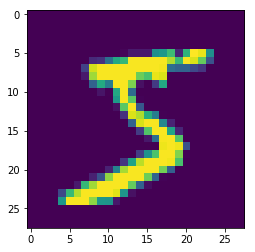

In [5]:
plt.imshow(x_train[0])

## 標準化

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

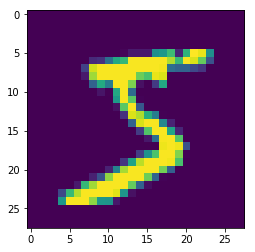

In [7]:
plt.imshow(x_train[0])

## 轉換資料維度
### 轉換成 長, 寬, channel數

In [8]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print('train',x_train.shape)
print('test', x_test.shape)

train (60000, 28, 28, 1)
test (10000, 28, 28, 1)


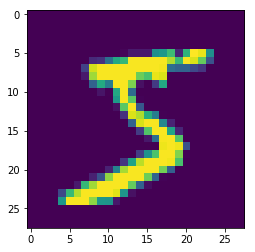

In [9]:
plt.imshow(x_train[0][:,:,0])

## 將y做 one hot encoding

In [10]:
y_train = to_categorical(y_train, num_classes = 10)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## 建立 CNN模型

In [12]:
#kernel_size就是filter的大小
#pool_size就是pool的大小
#stride是pool移動時的步伐
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3) 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3) 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 256)         295168    
__________

In [13]:
history = model.fit(x_train,y_train, batch_size=512,
                    epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 103s 2ms/step - loss: 0.4765 - acc: 0.8541
Epoch 2/5
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0961 - acc: 0.9704
Epoch 3/5
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0698 - acc: 0.9782
Epoch 4/5
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0528 - acc: 0.9837
Epoch 5/5
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0409 - acc: 0.9871


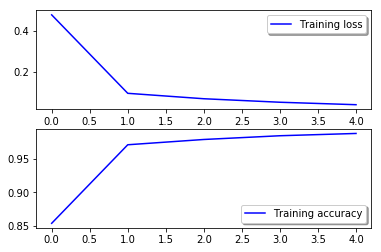

In [14]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## 驗證模型性能

In [15]:
# 預測測試樣本是各類別的機率
y_pred = model.predict(x_test)

# 將預測機率轉換成預測類別
y_pred_classes = np.argmax(y_pred,axis = 1) 

y_true = y_test

In [16]:
score = accuracy_score(y_true, y_pred_classes)
print('在測試樣本上的準確率:',score*100,"%")

在測試樣本上的準確率: 98.59 %


In [ ]:
from keras.datasets import mnist
from autokeras.image_supervised import ImageClassifier


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

clf = ImageClassifier(verbose=True)
clf.fit(x_train, y_train, time_limit=8 * 60 * 60)
clf.final_fit(x_train, y_train, x_test, y_test, retrain=True)
y = clf.evaluate(x_test, y_test)
print(y)


Initializing search.
Initialization finished.


╒==============================================╕
|               Training model 0               |
╘==============================================╛
